In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures

train_info = pd.read_csv('mnist_train_binary.csv')
test_info = pd.read_csv('mnist_test_binary.csv')

# Convert labels
train_label = np.where(train_info['label'] == 1, 1, -1)
test_label = np.where(test_info['label'] == 1, 1, -1)

# Drop 'label' column
train_data = train_info.drop(columns='label').to_numpy()
test_data = test_info.drop(columns='label').to_numpy()

pca = PCA(2)
X_train = pca.fit_transform(train_data)
X_test = pca.transform(test_data)

poly = PolynomialFeatures(3)
X_train3 = poly.fit_transform(X_train)
X_test3 = poly.transform(X_test)

In [2]:
X_train3.shape
X_train.shape

(12163, 2)

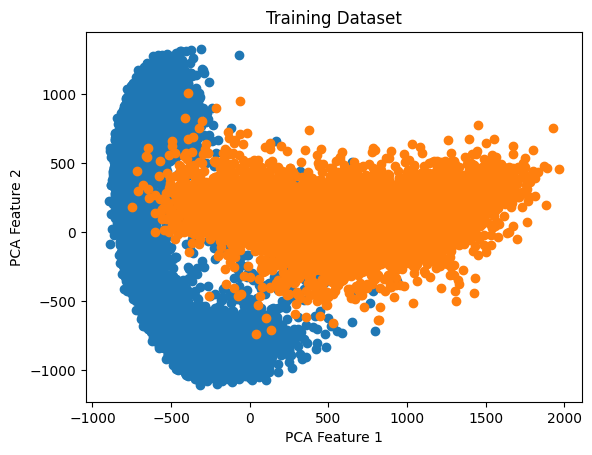

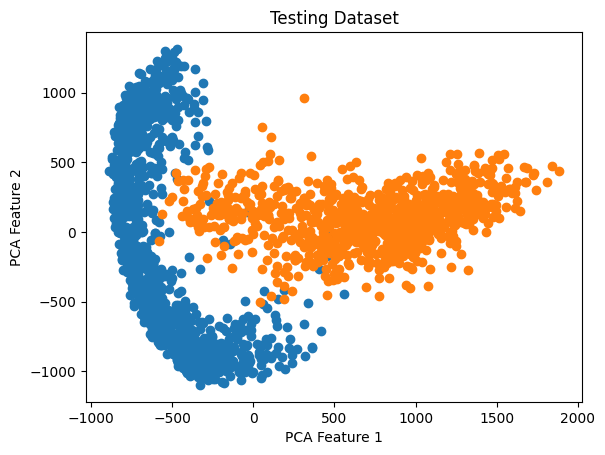

In [3]:
import matplotlib.pyplot as plt

plt.scatter(X_train[train_label==1][:,0],X_train[train_label==1][:,1])
plt.scatter(X_train[train_label==-1][:,0],X_train[train_label==-1][:,1])
plt.title('Training Dataset')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.show()

plt.scatter(X_test[test_label==1][:,0],X_test[test_label==1][:,1])
plt.scatter(X_test[test_label==-1][:,0],X_test[test_label==-1][:,1])
plt.title('Testing Dataset')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.show()

In [4]:
class PerceptronPocket():
    def __init__(self) -> None:
        pass

    def predict(self,x):
        return np.sign(np.dot(x,self.w))
    
    def updateWeights(self,pred,true,in_val):
        if pred*true <= 1:
            self.w += (true-pred)*in_val
    
    def train(self,x,y):
        self.history = []
        # x = np.concatenate((np.ones((x.shape[0],1)),x),1)
        self.w = (np.linalg.inv(x.T @ x) @ x.T) @ y
        pred = self.predict(x)
        for _ in range(5):
            for i in range(x.shape[0]):
                pred = self.predict(x[i,:])
                old_weight = self.w
                old_acc = np.sum(self.predict(x)!=y)
                self.updateWeights(pred,y[i],x[i,:])
                new_acc = np.sum(self.predict(x)!=y)
                if old_acc < new_acc:
                    self.w = old_weight
        E_train = (np.sum(self.predict(x)!=y)/y.shape[0])
        E_train_out = E_train + np.sqrt((8/x.shape[0]*np.log(4*(np.power(2*x.shape[0],3)+1)/0.05)))
        print(f'E_train_in: {E_train}, E_train_out: {E_train_out}')
        

In [5]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train,train_label)
E_train = np.sum(clf.predict(X_train) != train_label)/train_label.shape[0]
E_train_out = E_train + np.sqrt((8/train_label.shape[0]*np.log(4*(np.power(2*train_label.shape[0],3)+1)/0.05)))

E_test = np.sum(clf.predict(X_test) != test_label)/test_label.shape[0]
E_test_out = E_test + np.sqrt((1/(2*X_test.shape[0]))*np.log(2/0.05))
print(f'E_test_in: {E_test}, E_test_out: {E_test_out}')

E_test_in: 0.053280710409472125, E_test_out: 0.0834458514029741


C:\Users\arudy\AppData\Local\Temp\ipykernel_61812\3167277982.py:4: RuntimeWarning: overflow encountered in scalar multiply
  E_train_out = E_train + np.sqrt((8/train_label.shape[0]*np.log(4*(np.power(2*train_label.shape[0],3)+1)/0.05)))


In [6]:
clf = LogisticRegression().fit(X_train3,train_label)
E_train = np.sum(clf.predict(X_train3) != train_label)/train_label.shape[0]
E_train_out = E_train + np.sqrt((8/train_label.shape[0]*np.log(4*(np.power(2*train_label.shape[0],3)+1)/0.05)))

E_test = np.sum(clf.predict(X_test3) != test_label)/test_label.shape[0]
E_test_out = E_test + np.sqrt((1/(2*X_test3.shape[0]))*np.log(2/0.05))
print(f'E_test_in: {E_test}, E_test_out: {E_test_out}')

E_test_in: 0.03946719289590528, E_test_out: 0.06963233388940725


C:\Users\arudy\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\arudy\AppData\Local\Temp\ipykernel_61812\613703610.py:3: RuntimeWarning: overflow encountered in scalar multiply
  E_train_out = E_train + np.sqrt((8/train_label.shape[0]*np.log(4*(np.power(2*train_label.shape[0],3)+1)/0.05)))


In [7]:
clf.coef_

array([[-4.05769015e-10,  2.09718875e-08, -5.71024792e-08,
        -1.06483138e-05, -2.60692535e-06,  4.04469801e-06,
        -2.99672404e-08, -3.84412437e-08, -3.66187109e-08,
        -9.92905865e-09]])

In [8]:
def polynomial_equation(x2):
    global a
    global x1_value
    x1 = x1_value
    return a[0] + a[1]*x1 + a[2]*x2 + a[3]*x1**2 + a[4]*x2**2 + a[5]*x1*x2 + a[6]*x1**3 + a[7]*x2**3 + a[8]*x1**2*x2 + a[9]*x1*x2**2

In [9]:
percept = PerceptronPocket()
percept.train(X_train,train_label)
E_test = np.sum(percept.predict(X_test)!=test_label)/test_label.shape[0]
E_test_out = E_test + np.sqrt((1/(2*X_test.shape[0]))*np.log(2/0.05))
print(f'E_test_in: {E_test}, E_test_out: {E_test_out}')

E_train_in: 0.10449724574529311, E_train_out: 0.23082990595354208
E_test_in: 0.09176122348297977, E_test_out: 0.12192636447648174


C:\Users\arudy\AppData\Local\Temp\ipykernel_61812\202777812.py:27: RuntimeWarning: overflow encountered in scalar multiply
  E_train_out = E_train + np.sqrt((8/x.shape[0]*np.log(4*(np.power(2*x.shape[0],3)+1)/0.05)))


In [11]:
percept.w

array([-1750.49294828, -1136.95388603])

In [10]:
percept3 = PerceptronPocket()
percept3.train(X_train3,train_label)
E_test = np.sum(percept3.predict(X_test3)!=test_label)/test_label.shape[0]
E_test_out = E_test + np.sqrt((1/(2*X_test3.shape[0]))*np.log(2/0.05))
a = percept3.w
polynomial_equation(10)
print(f'E_test_in: {E_test}, E_test_out: {E_test_out}')

C:\Users\arudy\AppData\Local\Temp\ipykernel_61812\202777812.py:27: RuntimeWarning: overflow encountered in scalar multiply
  E_train_out = E_train + np.sqrt((8/x.shape[0]*np.log(4*(np.power(2*x.shape[0],3)+1)/0.05)))


E_train_in: 0.20274603305105648, E_train_out: 0.3290786932593055


NameError: name 'x1_value' is not defined

In [14]:
def plotPoly(w,label,axis,color):
    xx1 = np.linspace(0,1,1000)
    xx2 = np.linspace(0,1,1000)
    z = np.zeros((1000, 1000))
    for i_x1, x1 in enumerate(xx1):
        for i_x2, x2 in enumerate(xx2):
            z[i_x2, i_x1] = \
                w[0]*1 + \
                w[1]*x

 message: The iteration is not making good progress, as measured by the 
            improvement from the last ten iterations.
 success: False
  status: 5
     fun: [-2.737e+08]
       x: [-8.850e-05]
    nfev: 12
    fjac: [[-1.000e+00]]
       r: [ 1.156e+09]
     qtf: [ 2.738e+08]